#⚡ Extração

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/julyane-domingues/Challenge-TelecomX_Parte2/refs/heads/main/dados_telecom_x.csv'

In [ ]:
dados = pd.read_csv(url)
dados

,id_cliente,evasao,genero,senioridade,tem_parceiro,tem_dependentes,meses_contrato,tem_servico_telefone,multiplas_linhas_telefone,tipo_servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_impressa,forma_pagamento,fatura_diária,fatura_mensal,fatura_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7043 non-null   object 
 1   evasao                     7043 non-null   object 
 2   genero                     7043 non-null   object 
 3   senioridade                7043 non-null   int64  
 4   tem_parceiro               7043 non-null   object 
 5   tem_dependentes            7043 non-null   object 
 6   meses_contrato             7043 non-null   int64  
 7   tem_servico_telefone       7043 non-null   object 
 8   multiplas_linhas_telefone  7043 non-null   object 
 9   tipo_servico_internet      7043 non-null   object 
 10  seguranca_online           7043 non-null   object 
 11  backup_online              7043 non-null   object 
 12  protecao_dispositivo       7043 non-null   object 
 13  suporte_tecnico            7043 non-null   objec

In [ ]:
dados.isna().sum()

,0
id_cliente,0
evasao,0
genero,0
senioridade,0
tem_parceiro,0
tem_dependentes,0
meses_contrato,0
tem_servico_telefone,0
multiplas_linhas_telefone,0
tipo_servico_internet,0


# 🛠️ Preparação dos dados

In [ ]:
dados = dados.drop(columns=['id_cliente'])

In [ ]:
dados_clean = dados.copy()

cols_to_fix = [
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes'
]

for col in cols_to_fix:
    dados_clean[col] = dados_clean[col].replace('No internet service', 'No')

In [ ]:
categorical_cols = [
       'evasao', 'genero', 'tem_parceiro', 'tem_dependentes',
       'tem_servico_telefone', 'multiplas_linhas_telefone',
       'tipo_servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'tipo_contrato', 'fatura_impressa',
       'forma_pagamento'
]

dados_encoded = pd.get_dummies(dados_clean, columns=categorical_cols, drop_first=True)
dados_encoded

,senioridade,meses_contrato,fatura_diária,fatura_mensal,fatura_total,evasao_Yes,genero_Male,tem_parceiro_Yes,tem_dependentes_Yes,tem_servico_telefone_Yes,...,protecao_dispositivo_Yes,suporte_tecnico_Yes,streaming_tv_Yes,streaming_filmes_Yes,tipo_contrato_One year,tipo_contrato_Two year,fatura_impressa_Yes,forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [ ]:
dados_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   senioridade                                 7043 non-null   int64  
 1   meses_contrato                              7043 non-null   int64  
 2   fatura_diária                               7043 non-null   float64
 3   fatura_mensal                               7043 non-null   float64
 4   fatura_total                                7043 non-null   float64
 5   evasao_Yes                                  7043 non-null   bool   
 6   genero_Male                                 7043 non-null   bool   
 7   tem_parceiro_Yes                            7043 non-null   bool   
 8   tem_dependentes_Yes                         7043 non-null   bool   
 9   tem_servico_telefone_Yes                    7043 non-null   bool   
 10  multiplas_li

In [ ]:
dados_encoded.isnull().sum()

,0
senioridade,0
meses_contrato,0
fatura_diária,0
fatura_mensal,0
fatura_total,0
evasao_Yes,0
genero_Male,0
tem_parceiro_Yes,0
tem_dependentes_Yes,0
tem_servico_telefone_Yes,0


In [ ]:
dados_encoded.columns = dados_encoded.columns.str.lower()
dados_encoded.columns

Index(['senioridade', 'meses_contrato', 'fatura_diária', 'fatura_mensal',
       'fatura_total', 'evasao_yes', 'genero_male', 'tem_parceiro_yes',
       'tem_dependentes_yes', 'tem_servico_telefone_yes',
       'multiplas_linhas_telefone_no phone service',
       'multiplas_linhas_telefone_yes', 'tipo_servico_internet_fiber optic',
       'tipo_servico_internet_no', 'seguranca_online_yes', 'backup_online_yes',
       'protecao_dispositivo_yes', 'suporte_tecnico_yes', 'streaming_tv_yes',
       'streaming_filmes_yes', 'tipo_contrato_one year',
       'tipo_contrato_two year', 'fatura_impressa_yes',
       'forma_pagamento_credit card (automatic)',
       'forma_pagamento_electronic check', 'forma_pagamento_mailed check'],
      dtype='object')

✔️ Normalização/Padronização

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])
dados.head()

,evasao,genero,senioridade,tem_parceiro,tem_dependentes,meses_contrato,tem_servico_telefone,multiplas_linhas_telefone,tipo_servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_impressa,forma_pagamento,fatura_diária,fatura_mensal,fatura_total
0,No,Female,0.0,Yes,Yes,0.125000,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.543210,0.471144,0.066294
1,No,Male,0.0,No,No,0.125000,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.496296,0.414428,0.060420
2,Yes,Male,0.0,No,No,0.055556,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.577778,0.553731,0.030239
3,Yes,Male,1.0,Yes,No,0.180556,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.782716,0.793532,0.140670
4,Yes,Female,1.0,Yes,No,0.041667,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.733333,0.653234,0.028687


# 🎯 Correlação e Seleção de Variáveis

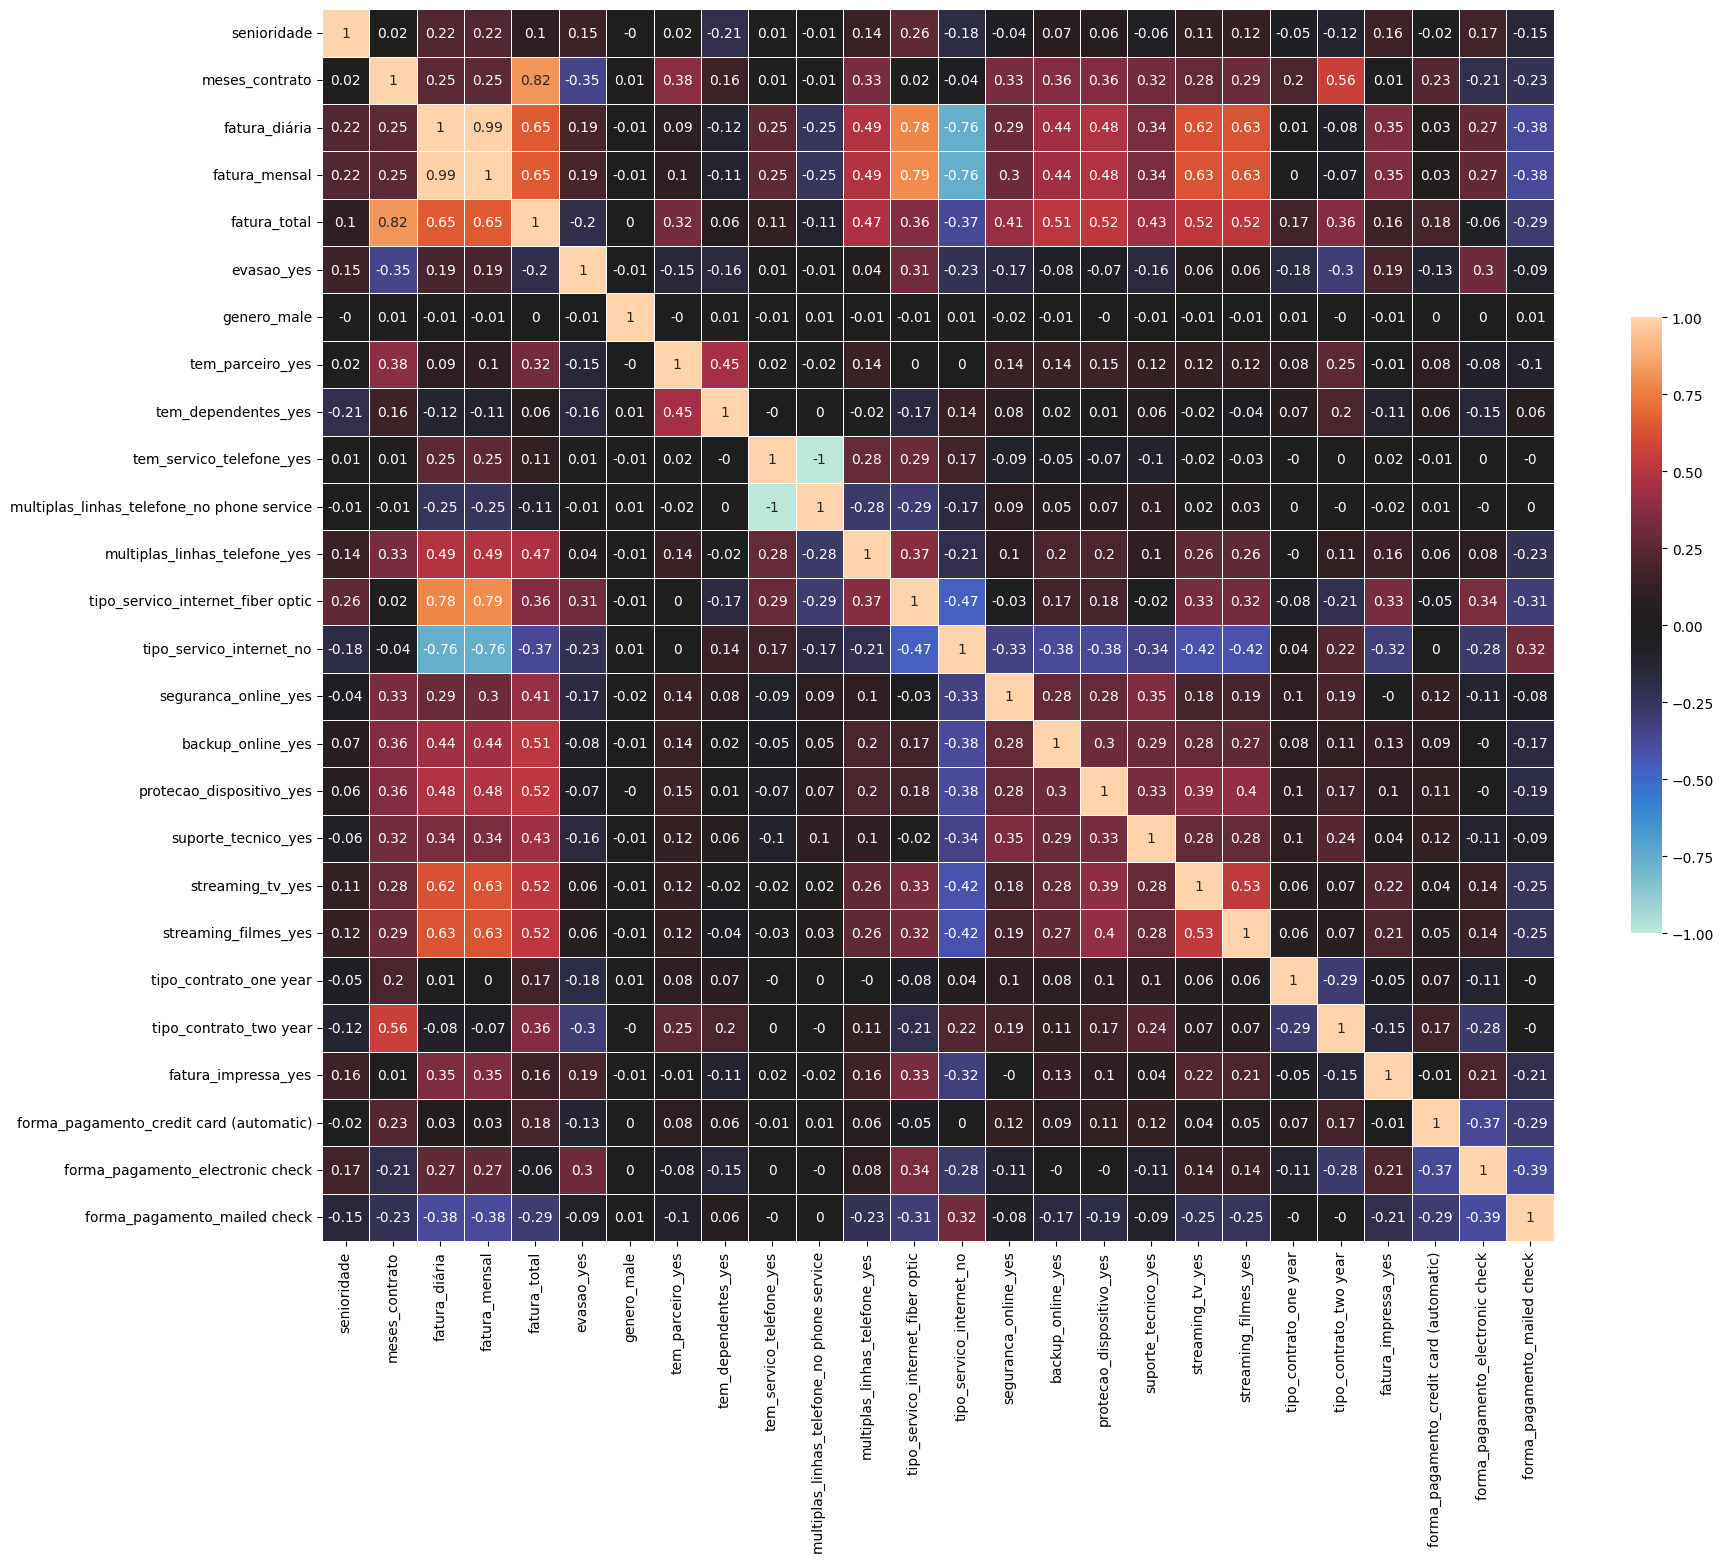

In [ ]:
corr = dados_encoded.corr()

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

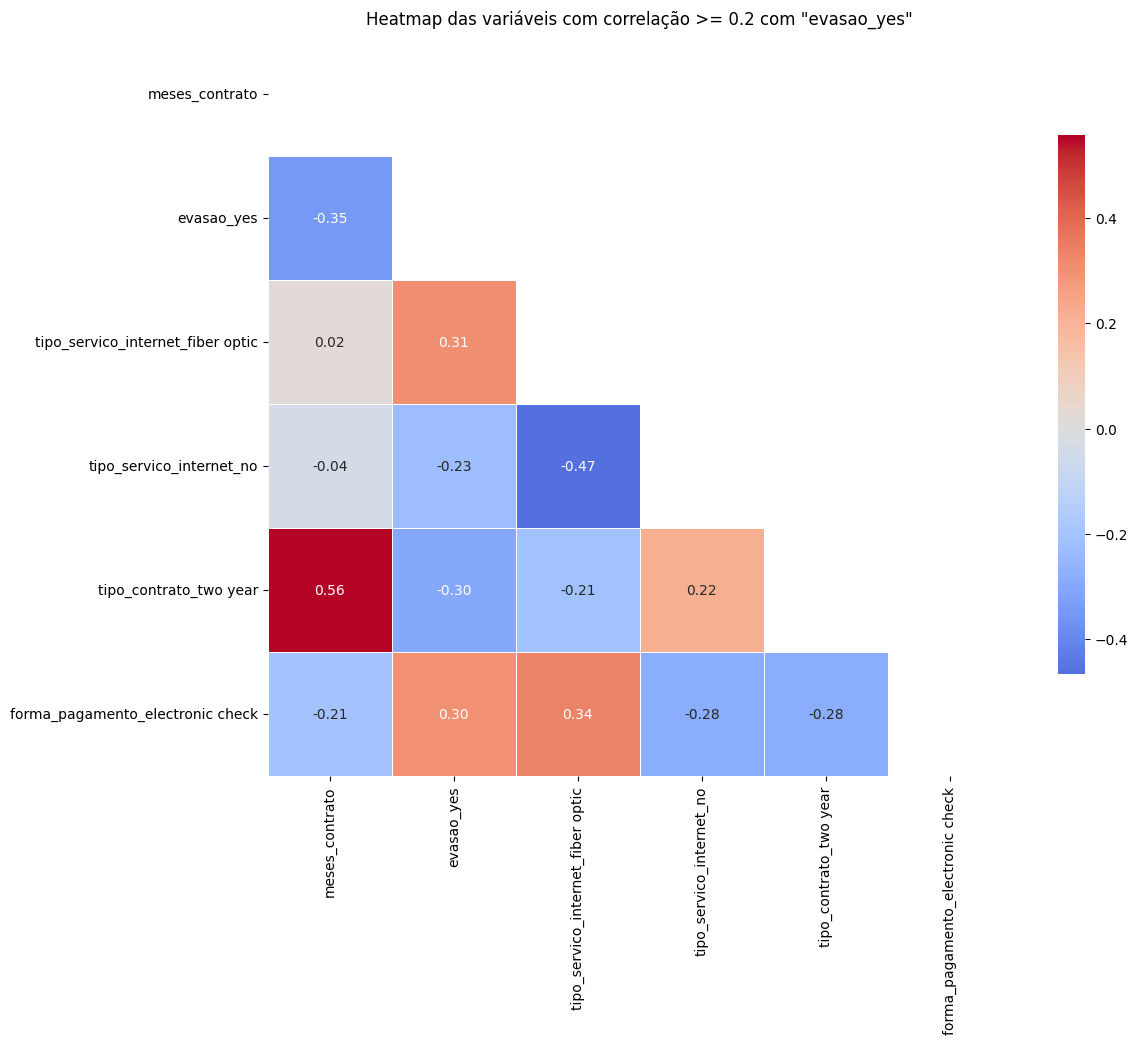

In [ ]:
target_var = 'evasao_yes'

limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

In [ ]:
dados_encoded

,senioridade,meses_contrato,fatura_diária,fatura_mensal,fatura_total,evasao_yes,genero_male,tem_parceiro_yes,tem_dependentes_yes,tem_servico_telefone_yes,...,protecao_dispositivo_yes,suporte_tecnico_yes,streaming_tv_yes,streaming_filmes_yes,tipo_contrato_one year,tipo_contrato_two year,fatura_impressa_yes,forma_pagamento_credit card (automatic),forma_pagamento_electronic check,forma_pagamento_mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
# Aqui, não inclua a variável-alvo (ex: Churn_Yes) no cálculo do VIF.
X = dados_encoded.drop(columns=['evasao_yes'])

In [ ]:
X_const = add_constant(X)

In [ ]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,tem_servico_telefone_yes,inf
10,multiplas_linhas_telefone_no phone service,inf
4,fatura_mensal,951.268356
12,tipo_servico_internet_fiber optic,148.265324
13,tipo_servico_internet_no,104.220623
3,fatura_diária,89.500832
19,streaming_filmes_yes,24.112468
18,streaming_tv_yes,24.057260
5,fatura_total,10.541609
2,meses_contrato,7.318382


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy()

cols_to_drop = [
    "tem_servico_telefone_yes",
    "multiplas_linhas_telefone_no phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

X_filtered.drop(columns=["fatura_diária"], inplace=True)

X_filtered.drop(columns=["tipo_servico_internet_no"], inplace=True)

X_filtered = X_filtered.astype(float)


vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.221952
3,fatura_mensal,18.121961
4,fatura_total,10.442421
2,meses_contrato,7.273617
9,tipo_servico_internet_fiber optic,6.998977
17,tipo_contrato_two year,2.508908
14,streaming_tv_yes,2.188465
15,streaming_filmes_yes,2.188312
20,forma_pagamento_electronic check,1.967638
21,forma_pagamento_mailed check,1.850788


In [ ]:
X_final = X_filtered.drop(columns=["fatura_total"])

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.594502
3,fatura_mensal,17.284744
8,tipo_servico_internet_fiber optic,6.934263
2,meses_contrato,2.783636
16,tipo_contrato_two year,2.502672
13,streaming_tv_yes,2.165570
14,streaming_filmes_yes,2.164623
19,forma_pagamento_electronic check,1.964292
20,forma_pagamento_mailed check,1.828498
12,suporte_tecnico_yes,1.712057


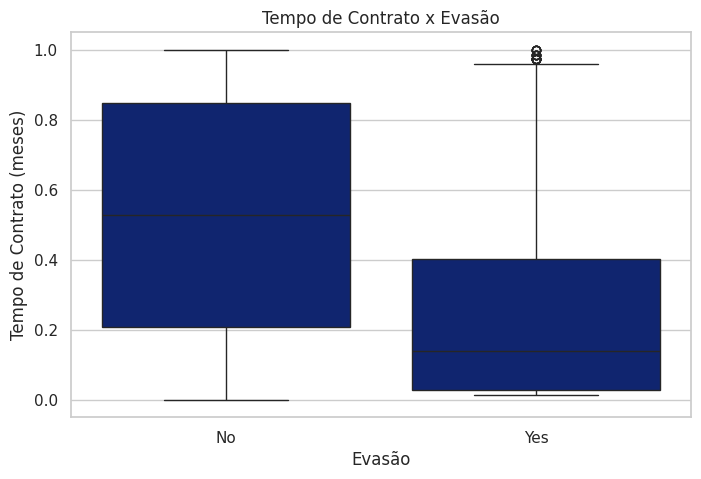

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", palette="dark")
sns.boxplot(data=dados, x='evasao', y='meses_contrato')
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()


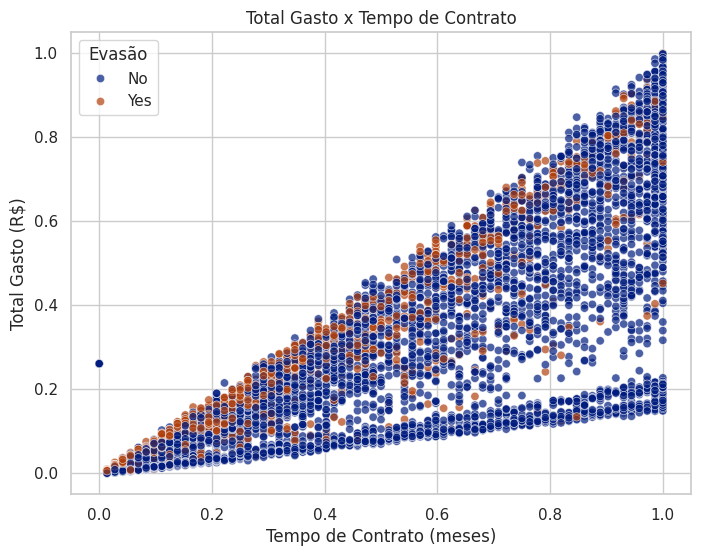

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid", palette="dark")
sns.scatterplot(data=dados, x='meses_contrato', y='fatura_total', hue='evasao', alpha=0.7)
plt.title('Total Gasto x Tempo de Contrato')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Evasão')
plt.show()


# 🤖 Modelagem Preditiva

In [ ]:
x = dados_encoded.drop('evasao_yes', axis=1)
y = dados_encoded['evasao_yes']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, stratify = y,  random_state = 5)

In [ ]:
scaler = StandardScaler()
x_treino_scaled = scaler.fit_transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

In [ ]:
smote = SMOTE(random_state=5)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino_scaled, y_treino)

Regressão Logistica

In [ ]:
lr = LogisticRegression(random_state=5)
lr.fit(x_treino_resampled, y_treino_resampled)

LogisticRegression(random_state=5)

In [ ]:
y_pred_lr = lr.predict(x_teste_scaled)
y_prob_lr = lr.predict_proba(x_teste_scaled)[:, 1]

In [ ]:
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_teste, y_pred_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_teste, y_prob_lr))
print(classification_report(y_teste, y_pred_lr))

Regressão Logística
Acurácia: 0.7666824420255561
Matriz de Confusão:
 [[1177  375]
 [ 118  443]]
ROC AUC: 0.8527677472113494
              precision    recall  f1-score   support

       False       0.91      0.76      0.83      1552
        True       0.54      0.79      0.64       561

    accuracy                           0.77      2113
   macro avg       0.73      0.77      0.73      2113
weighted avg       0.81      0.77      0.78      2113



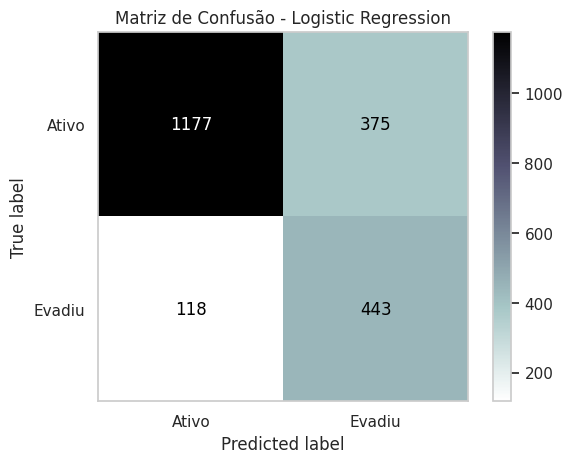

In [ ]:
# Gerar matriz de confusão de LogisticRegression
cm = confusion_matrix(y_teste, y_pred_lr)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadiu'])
ax = disp.plot(cmap='bone_r')
ax.ax_.grid(False)
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

In [ ]:
# Extrair os coeficientes do modelo
coeficientes = lr.coef_[0]
nomes_variaveis = x_treino.columns

# Criar um DataFrame para visualizar os coeficientes e os nomes das variáveis
importancia_variaveis_lr = pd.DataFrame({
    'Variavel': nomes_variaveis,
    'Coeficiente': coeficientes
})

importancia_variaveis_lr['Magnitude_Coeficiente'] = abs(importancia_variaveis_lr['Coeficiente'])
importancia_variaveis_lr = importancia_variaveis_lr.sort_values(by='Magnitude_Coeficiente', ascending=False)

display(importancia_variaveis_lr)

,Variavel,Coeficiente,Magnitude_Coeficiente
1,meses_contrato,-1.579293,1.579293
3,fatura_mensal,-1.133515,1.133515
4,fatura_total,0.855797,0.855797
20,tipo_contrato_two year,-0.615507,0.615507
11,tipo_servico_internet_fiber optic,0.580250,0.580250
2,fatura_diária,0.551992,0.551992
12,tipo_servico_internet_no,-0.513295,0.513295
19,tipo_contrato_one year,-0.343557,0.343557
21,fatura_impressa_yes,0.233856,0.233856
18,streaming_filmes_yes,0.213740,0.213740


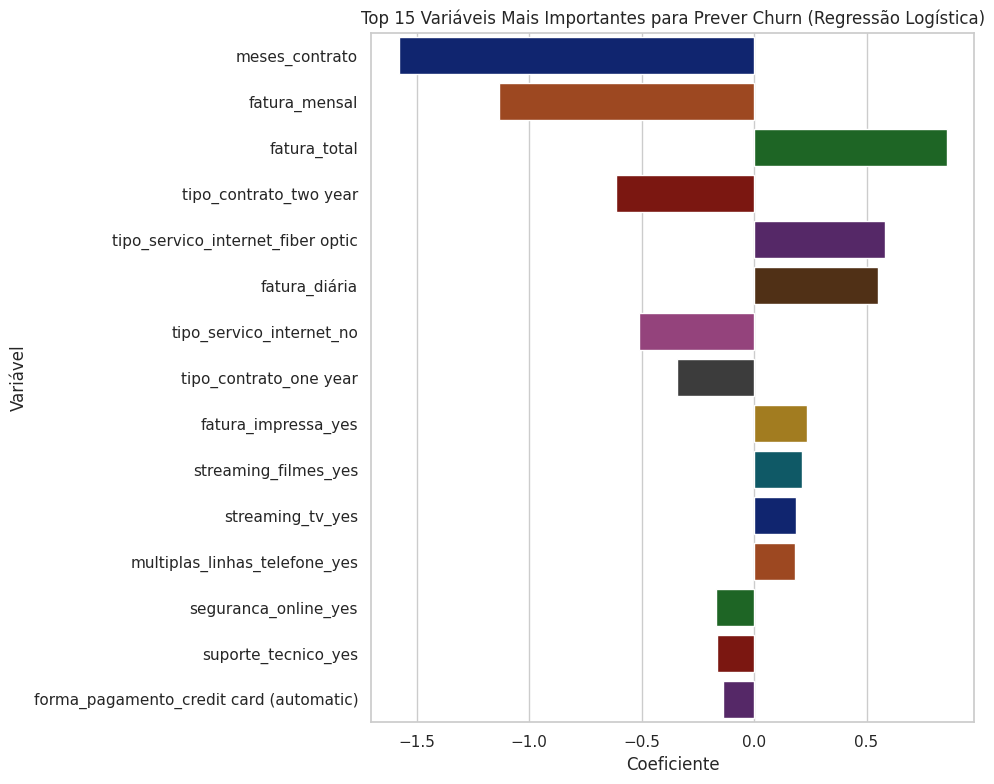

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coeficiente',
    y='Variavel',
    hue='Variavel',
    data=importancia_variaveis_lr.head(15),  # Top 15
    palette='dark'
)
plt.title('Top 15 Variáveis Mais Importantes para Prever Churn (Regressão Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=5)
rf.fit(x_treino_resampled, y_treino_resampled)

RandomForestClassifier(random_state=5)

In [ ]:
y_pred_rf = rf.predict(x_teste_scaled)
y_prob_rf = rf.predict_proba(x_teste_scaled)[:, 1]

In [ ]:
print("Random Forest")
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_teste, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_rf))
print(classification_report(y_teste, y_pred_rf))

Random Forest
Acurácia: 0.7983909133932797
ROC AUC: 0.8387349082088317
Matriz de Confusão:
 [[1345  207]
 [ 219  342]]
              precision    recall  f1-score   support

       False       0.86      0.87      0.86      1552
        True       0.62      0.61      0.62       561

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.80      0.80      0.80      2113



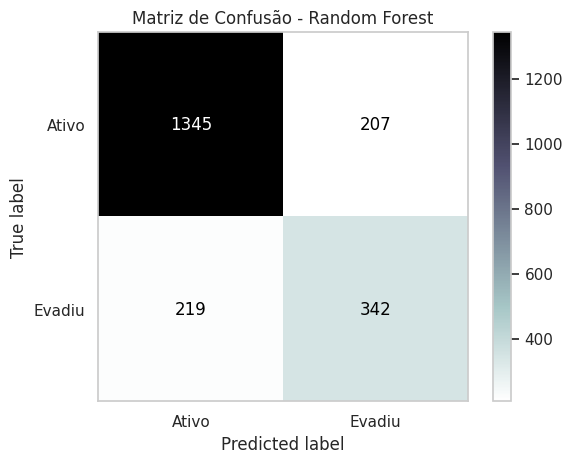

In [ ]:
# Gerar matriz de confusão de Random Forest
cm = confusion_matrix(y_teste, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadiu'])
ax = disp.plot(cmap='bone_r')
ax.ax_.grid(False)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

,Variavel,Importancia
1,meses_contrato,0.152393
4,fatura_total,0.119807
3,fatura_mensal,0.115228
2,fatura_diária,0.103080
20,tipo_contrato_two year,0.058780
11,tipo_servico_internet_fiber optic,0.047988
23,forma_pagamento_electronic check,0.045759
21,fatura_impressa_yes,0.036281
19,tipo_contrato_one year,0.033360
16,suporte_tecnico_yes,0.032363


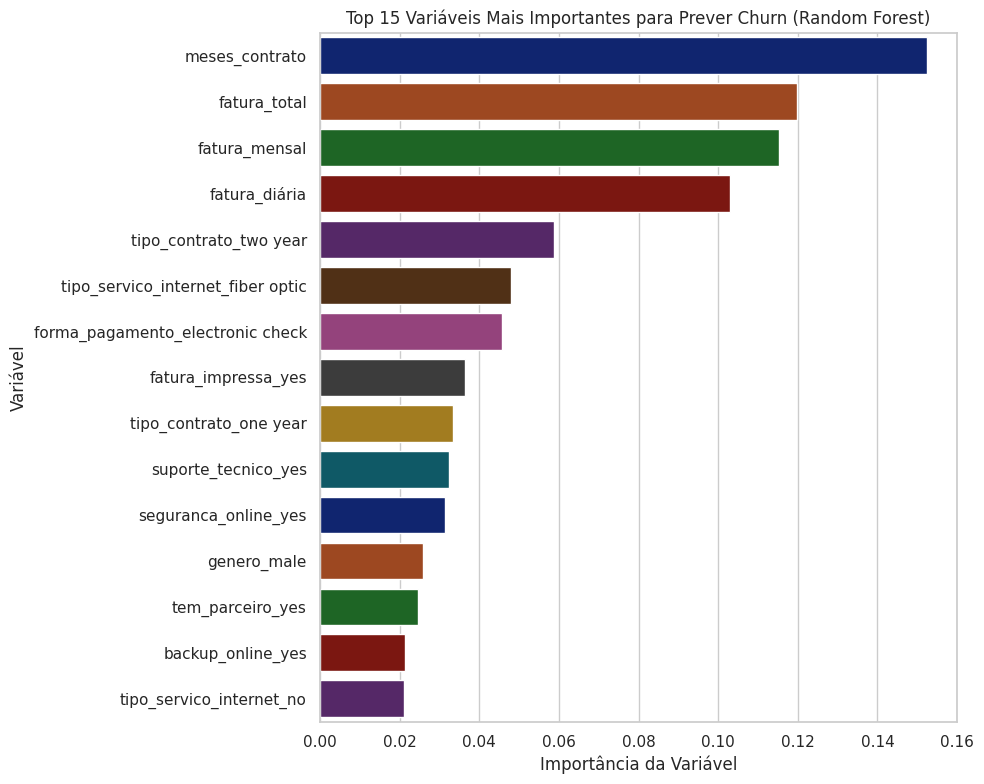

In [ ]:
# Extrair a importância das variáveis do modelo Random Forest
importancia_variaveis_rf = pd.DataFrame({
    'Variavel': x_treino.columns,
    'Importancia': rf.feature_importances_
})

# Ordenar as variáveis pela importância
importancia_variaveis_rf = importancia_variaveis_rf.sort_values(by='Importancia', ascending=False)

display(importancia_variaveis_rf)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importancia',
    y='Variavel',
    hue='Variavel',
    data=importancia_variaveis_rf.head(15),  # Top 15
    palette='dark'
)
plt.title('Top 15 Variáveis Mais Importantes para Prever Churn (Random Forest)')
plt.xlabel('Importância da Variável')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

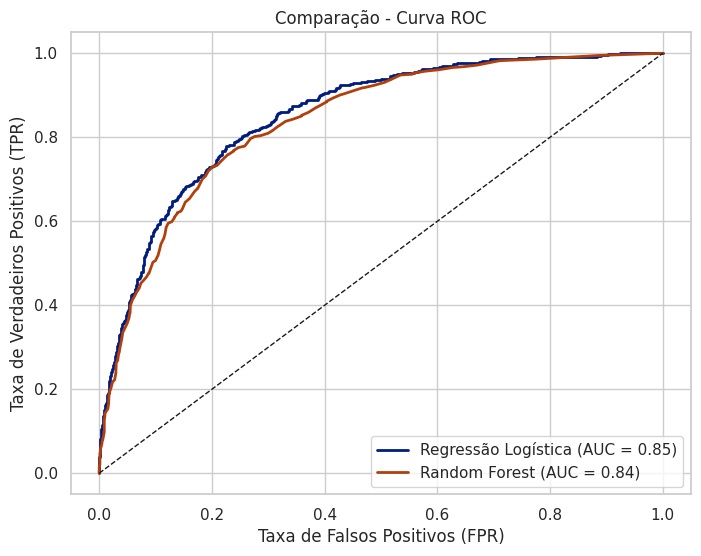

In [45]:
# Modelo 1 : Logistic Regression
lr = LogisticRegression(random_state=5)
lr.fit(x_treino_resampled, y_treino_resampled)
y_pred_lr = lr.predict(x_teste_scaled)
y_prob_lr = lr.predict_proba(x_teste_scaled)[:, 1]

# Modelo 2: Random Forest
rf = RandomForestClassifier(random_state=5)
rf.fit(x_treino_resampled, y_treino_resampled)
y_pred_rf = rf.predict(x_teste_scaled)
y_prob_rf = rf.predict_proba(x_teste_scaled)[:, 1]


fpr_lr, tpr_lr, _ = roc_curve(y_teste, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_teste, y_prob_rf)


auc_lr = roc_auc_score(y_teste, y_prob_lr)
auc_rf = roc_auc_score(y_teste, y_prob_rf)

#Plotando as curvas
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot([0,1], [0,1], 'k--', lw=1)


plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Comparação - Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


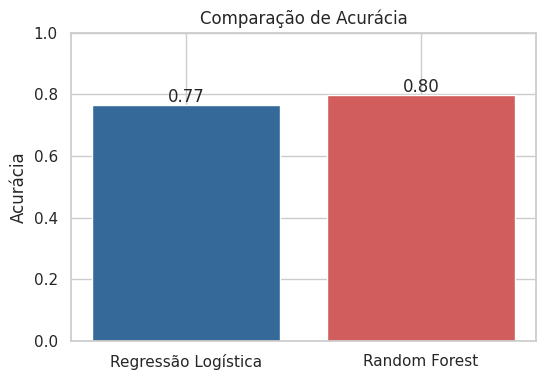

In [ ]:
# Modelo 1 : Logistic Regression
lr = LogisticRegression(random_state=5)
lr.fit(x_treino_resampled, y_treino_resampled)
y_pred_lr = lr.predict(x_teste_scaled)
y_prob_lr = lr.predict_proba(x_teste_scaled)[:, 1]

# Modelo 1 : Logistic Regression
rf = RandomForestClassifier(random_state=5)
rf.fit(x_treino_resampled, y_treino_resampled)
y_pred_rf = rf.predict(x_teste_scaled)
y_prob_rf = rf.predict_proba(x_teste_scaled)[:, 1]

# Acurácia
acc_lr = accuracy_score(y_teste, y_pred_lr)
acc_rf = accuracy_score(y_teste, y_pred_rf)


# Plot gráfico
plt.figure(figsize=(6,4))
plt.bar(['Regressão Logística', 'Random Forest'], [acc_lr, acc_rf], color=['#34699A', '#D25D5D'])
plt.ylim(0,1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia')
for i, v in enumerate([acc_lr, acc_rf]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

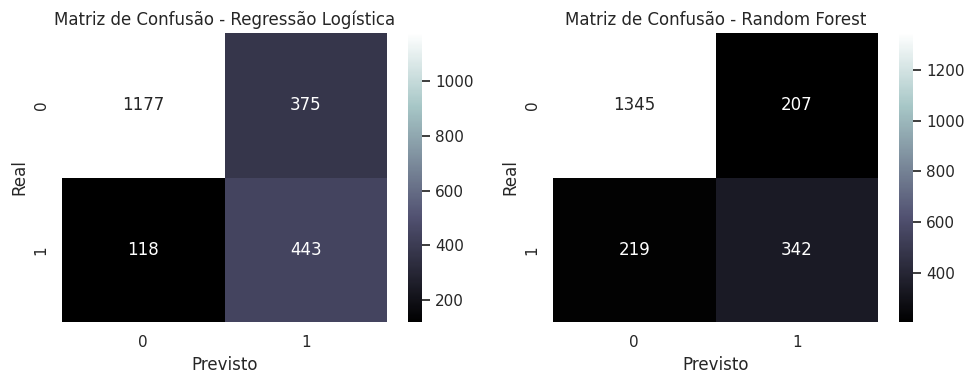

In [ ]:
# Plot Matrizes de Confusão
cm_lr = confusion_matrix(y_teste, y_pred_lr)
cm_rf = confusion_matrix(y_teste, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='bone', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística')
axes[0].set_xlabel('Previsto')
axes[0].set_ylabel('Real')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='bone', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Previsto')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# 📋 📉 Interpretação e Conclusões

# <font color=pink>**1.** Desempenho dos modelos</font>#

## 📊 <font color=pink>1.1.</font> Tabela Comparativa de Modelos de Classificação


| Métrica | Regressão Logística | Random Forest |
|---------|--------------------|---------------|
| **Acurácia** | <span style="color:orange">0,7667</span> | <span style="color:green">0,7984 ✅</span> |
| **ROC AUC** | <span style="color:green">0,8528 ✅</span> | <span style="color:orange">0,8387</span> |
| **Precisão (False)** | 0,91 🟢 | 0,86 🟠 |
| **Recall (False)** | 0,76 🟠 | 0,87 🟢 |
| **F1-Score (False)** | 0,83 🟠 | 0,86 🟢 |
| **Precisão (True)** | 0,54 🔴 | 0,62 🟢 |
| **Recall (True)** | 0,79 🟢 | 0,61 🔴 |
| **F1-Score (True)** | 0,64 🟢 | 0,62 🟠 |
| **Macro Avg - Precision** | 0,73 🟠 | 0,74 🟢 |
| **Macro Avg - Recall** | 0,77 🟢 | 0,74 🟠 |
| **Macro Avg - F1** | 0,73 🟠 | 0,74 🟢 |
| **Weighted Avg - Precision** | 0,81 🟢 | 0,80 🟠 |
| **Weighted Avg - Recall** | 0,77 🟠 | 0,80 🟢 |
| **Weighted Avg - F1** | 0,78 🟠 | 0,80 🟢 |



---
## 📉 <font color=pink>1.2.</font> Comparação entre Modelos de Classificação

### Modelos Avaliados

Foram treinados e avaliados dois modelos principais:

* **Regressão Logística (com balanceamento via SMOTE)**
* **Random Forest**
### 🔹 Modelo 1 – **Regressão Logística**
- **Acurácia:** 0,77
- **ROC AUC:** 0,85 (ligeiramente maior que o Random Forest)
- **Pontos fortes:**
  - **Recall** para a classe positiva (**True**): 0,79 → identifica mais casos positivos reais (menos falsos negativos).
- **Pontos fracos:**
  - **Precisão** para positivos: 0,54 → maior número de falsos positivos.


### 🔹 Modelo 2 – **Random Forest**
- **Acurácia:** 0,80 (maior que a Regressão Logística)
- **ROC AUC:** 0,84 (um pouco menor que a Regressão Logística)
- **Pontos fortes:**
  - **Precisão** para positivos: 0,62 → reduz o número de falsos positivos.
- **Pontos fracos:**
  - **Recall** para positivos: 0,61 → deixa passar mais casos positivos reais (mais falsos negativos).



---
## 📌 <font color=pink>1.3.</font> Resumo da Comparação

- Para maior acurácia e equilíbrio entre precisão e recall: **Random Forest** é mais indicado.  
-  Para é identificar o máximo possível de casos positivos (mesmo com mais falsos positivos): **Regressão Logística** é a melhor escolha.  

👉 **Conclusão**
* **Random Forest apresentou desempenho superior** em relação à Regressão Logística, com:

  * Maior **acurácia geral**.
  * Melhor separação entre classes (maior **AUC na curva ROC**).
  * Menor número de **erros de classificação (FP e FN)**.

* A **Regressão Logística** continua relevante, pois permite **interpretabilidade dos coeficientes**, fornecendo insights sobre o impacto de cada variável na probabilidade de evasão.

# <font color=pink>📋 Relatório Final de Análise</font>

## <font color=pink>2.1.</font> Objetivo

O objetivo deste estudo foi **analisar os fatores que influenciam a evasão de clientes** do TelecomX e desenvolver modelos preditivos capazes de identificar clientes com maior propensão a cancelar os serviços.

---

## <font color=pink>2.2</font> Importância das Variáveis (Regressão Logística)

A análise dos coeficientes permite interpretar quais fatores **aumentam** ou **reduzem** a chance de evasão:

| Variável                                      |                                 | Interpretação |
| ----------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | ------------- |
| **meses\_contrato** (-1.58)                           | Quanto maior o tempo de contrato, **menor a chance de churn**. Clientes antigos tendem a permanecer.                          |               |
| **fatura\_mensal** (-1.13)                            | Clientes com fatura mensal mais alta, em média, **têm menor evasão** (possivelmente associada a planos mais completos).       |               |
| **fatura\_total** (+0.85)                             | Quanto maior o total gasto acumulado, **maior a chance de churn** — clientes podem se sentir insatisfeitos ao longo do tempo. |               |
| **tipo\_contrato\_two year** (-0.61)                  | Contratos de **2 anos reduzem fortemente a chance de churn**.                                                                 |               |
| **tipo\_servico\_internet\_fiber optic** (+0.58)      | Clientes de **fibra óptica têm maior probabilidade de cancelar** (possível insatisfação ou concorrência).                     |               |
| **fatura\_diária** (+0.55)                            | Aumento da fatura média diária está associado a **maior evasão**.                                                             |               |
| **tipo\_servico\_internet\_no** (-0.51)               | Clientes **sem serviço de internet dificilmente cancelam** (provavelmente contratam apenas telefonia).                        |               |
| **tipo\_contrato\_one year** (-0.34)                  | Contratos de **1 ano reduzem evasão**, embora menos que os de 2 anos.                                                         |               |
| **fatura\_impressa\_yes** (+0.23)                     | Uso de **fatura impressa** está associado a maior churn.                                                                      |               |
| **streaming\_tv/filmes** (+0.18 / +0.21)              | Serviços de streaming estão ligados a **maior probabilidade de evasão**.                                                      |               |
| **segurança\_online\_yes** (-0.16)                    | Clientes com segurança online têm **menor evasão**.                                                                           |               |
| **suporte\_tecnico\_yes** (-0.16)                     | Clientes que usam suporte técnico têm **menor churn**.                                                                        |               |
| **forma\_pagamento\_credit card (automatic)** (-0.13) | Pagamento automático reduz a evasão.                                                                                          |               |
| **forma\_pagamento\_electronic check** (+0.07)        | O uso de cheque eletrônico está relacionado a **maior churn**.                                                                |               |

---

## <font color=pink>2.3.</font> Insights de Negócio

1. **Fidelização por contrato**

   * Contratos anuais e bienais são fundamentais para reduzir evasões.
   * Estratégia: incentivar a migração de clientes do plano mensal para contratos mais longos.

2. **Clientes de fibra óptica**

   * Necessário investigar a causa da insatisfação, pois este grupo apresenta maior risco de evasão.

3. **Perfil financeiro**

   * Clientes com **fatura total alta** tendem a cancelar após certo tempo.
   * Ações de retenção (descontos, benefícios de longo prazo) devem ser direcionadas a esse grupo.

4. **Serviços adicionais**

   * Recursos como **segurança online, suporte técnico e pagamentos automáticos** contribuem para retenção.
   * Estratégia: oferecer combos com esses serviços como incentivo à permanência.

---

## <font color=pink>2.4.</font> Conclusão

* O modelo **Random Forest** é o mais eficiente para prever evasão de clientes.
* A **Regressão Logística** trouxe insights valiosos sobre **quais variáveis impactam diretamente no churn**.
* A combinação das análises sugere estratégias práticas para:

  * **Reduzir evasão** (contratos longos, pagamento automático, serviços de segurança).
  * **Atuar preventivamente** em grupos de risco (clientes de fibra óptica, usuários de cheque eletrônico, clientes com altos gastos acumulados).

👉 Dessa forma, a empresa pode melhorar a **retenção de clientes**, aumentar a **satisfação** e reduzir perdas financeiras associadas ao churn.

